## 1. Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset

![Original_data](Original_data_set.png)

![Data_ETL_api](APIdataexcel.png)

![Data_ETL](WeatherDataputintoPython.png)

![Complemented_data_set](Complemented_data_set.png)

In [2]:
# Import dataset
df=pd.read_excel('Attend_Holiday_Weather_Merge230322_complemented.xlsx')

## 3. Exploratory Data Analysis


We will start off by checking the shape of the dataset.

In [3]:
df.shape

(1991, 20)

We can see that there are 1991 instances and 20 attributes in the dataset.

### Preview dataset

In [4]:
df.head()

,ATTDATE,CC,YearAligned,WeekAligned,DayAligned,WorkDay,StatDay,Prov,CITY,POSTAL_CODE,OtherPaidAbences,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours,Target,avg.temp,rainfall,text,condition_level
0,2019-01-02,102628,2019,1,3,Yes,0,QC,BROSSARD,J4W 0A4,8.0,68.27,37.5,18.5,443.28,0.701611,-12.5,0.0,NaN,1
1,2019-01-03,102628,2019,1,4,Yes,0,QC,BROSSARD,J4W 0A4,0.0,76.27,16.0,0.0,436.07,0.788406,-8.6,0.8,NaN,3
2,2019-01-04,102628,2019,1,5,Yes,0,QC,BROSSARD,J4W 0A4,5.0,76.27,16.0,5.0,435.54,0.765188,-0.3,1.4,NaN,1
3,2019-01-07,102628,2019,2,1,Yes,0,QC,BROSSARD,J4W 0A4,0.0,80.00,45.4,0.0,446.03,0.718853,-13.3,0.7,NaN,3
4,2019-01-08,102628,2019,2,2,Yes,0,QC,BROSSARD,J4W 0A4,2.0,96.00,37.4,0.0,452.41,0.700714,-4.5,4.3,NaN,2


### View summary of dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ATTDATE            1991 non-null   datetime64[ns]
 1   CC                 1991 non-null   int64         
 2   YearAligned        1991 non-null   int64         
 3   WeekAligned        1991 non-null   int64         
 4   DayAligned         1991 non-null   int64         
 5   WorkDay            1991 non-null   object        
 6   StatDay            1991 non-null   int64         
 7   Prov               1991 non-null   object        
 8   CITY               1991 non-null   object        
 9   POSTAL_CODE        1991 non-null   object        
 10  OtherPaidAbences   1991 non-null   float64       
 11  PlannedAbsences    1991 non-null   float64       
 12  UnplannedAbsences  1991 non-null   float64       
 13  UnpaidAbsences     1991 non-null   float64       
 14  Schedule

### View summary statistics of dataframe

In [6]:
df.describe()

,CC,YearAligned,WeekAligned,DayAligned,StatDay,OtherPaidAbences,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours,Target,avg.temp,rainfall,condition_level
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.0,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.00000,1991.000000,1991.00000
mean,239143.430437,2020.481165,26.536916,3.055751,0.0,9.361843,51.270166,38.395510,10.879658,471.030080,0.765497,7.01007,1.914214,1.18232
std,238373.192475,1.500259,15.083337,1.382375,0.0,9.565672,26.204072,25.223669,11.145512,147.861348,0.061413,11.07274,5.335055,0.51060
min,100636.000000,2019.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.425812,-31.10000,0.000000,1.00000
25%,100674.000000,2019.000000,13.000000,2.000000,0.0,1.665000,32.000000,21.300000,0.000000,405.660000,0.727528,0.00000,0.000000,1.00000
50%,100712.000000,2019.000000,26.000000,3.000000,0.0,8.000000,48.000000,34.500000,8.000000,446.410000,0.768199,8.10000,0.000000,1.00000
75%,651222.000000,2022.000000,40.000000,4.000000,0.0,16.000000,68.000000,53.000000,16.000000,580.400000,0.808736,15.80000,0.800000,1.00000
max,651222.000000,2022.000000,53.000000,6.000000,0.0,88.000000,147.080000,358.000000,92.730000,845.500000,1.000000,26.90000,67.000000,3.00000


### View summary data types of dataframe

In [7]:
df.dtypes

ATTDATE              datetime64[ns]
CC                            int64
YearAligned                   int64
WeekAligned                   int64
DayAligned                    int64
WorkDay                      object
StatDay                       int64
Prov                         object
CITY                         object
POSTAL_CODE                  object
OtherPaidAbences            float64
PlannedAbsences             float64
UnplannedAbsences           float64
UnpaidAbsences              float64
ScheduledHours              float64
Target                      float64
avg.temp                    float64
rainfall                    float64
text                         object
condition_level               int64
dtype: object

### Check for missing values

In [8]:
df.isnull().sum()

ATTDATE                 0
CC                      0
YearAligned             0
WeekAligned             0
DayAligned              0
WorkDay                 0
StatDay                 0
Prov                    0
CITY                    0
POSTAL_CODE             0
OtherPaidAbences        0
PlannedAbsences         0
UnplannedAbsences       0
UnpaidAbsences          0
ScheduledHours          0
Target                  0
avg.temp                0
rainfall                0
text                 1144
condition_level         0
dtype: int64

There are no missing values in the dataset, except text.

### Check normality of target

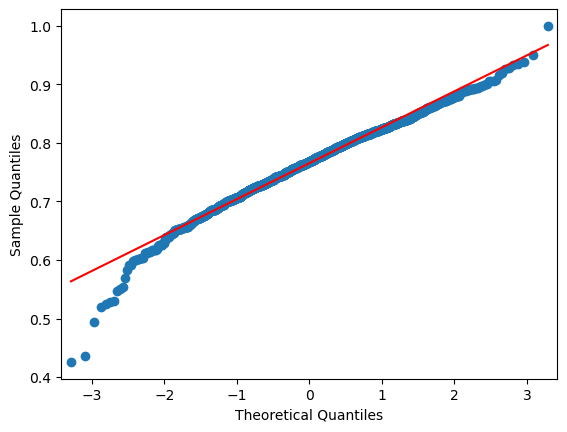

In [9]:
qqplot(df['Target'].dropna(),line='s')
pyplot.show()

### Cross Relation graph

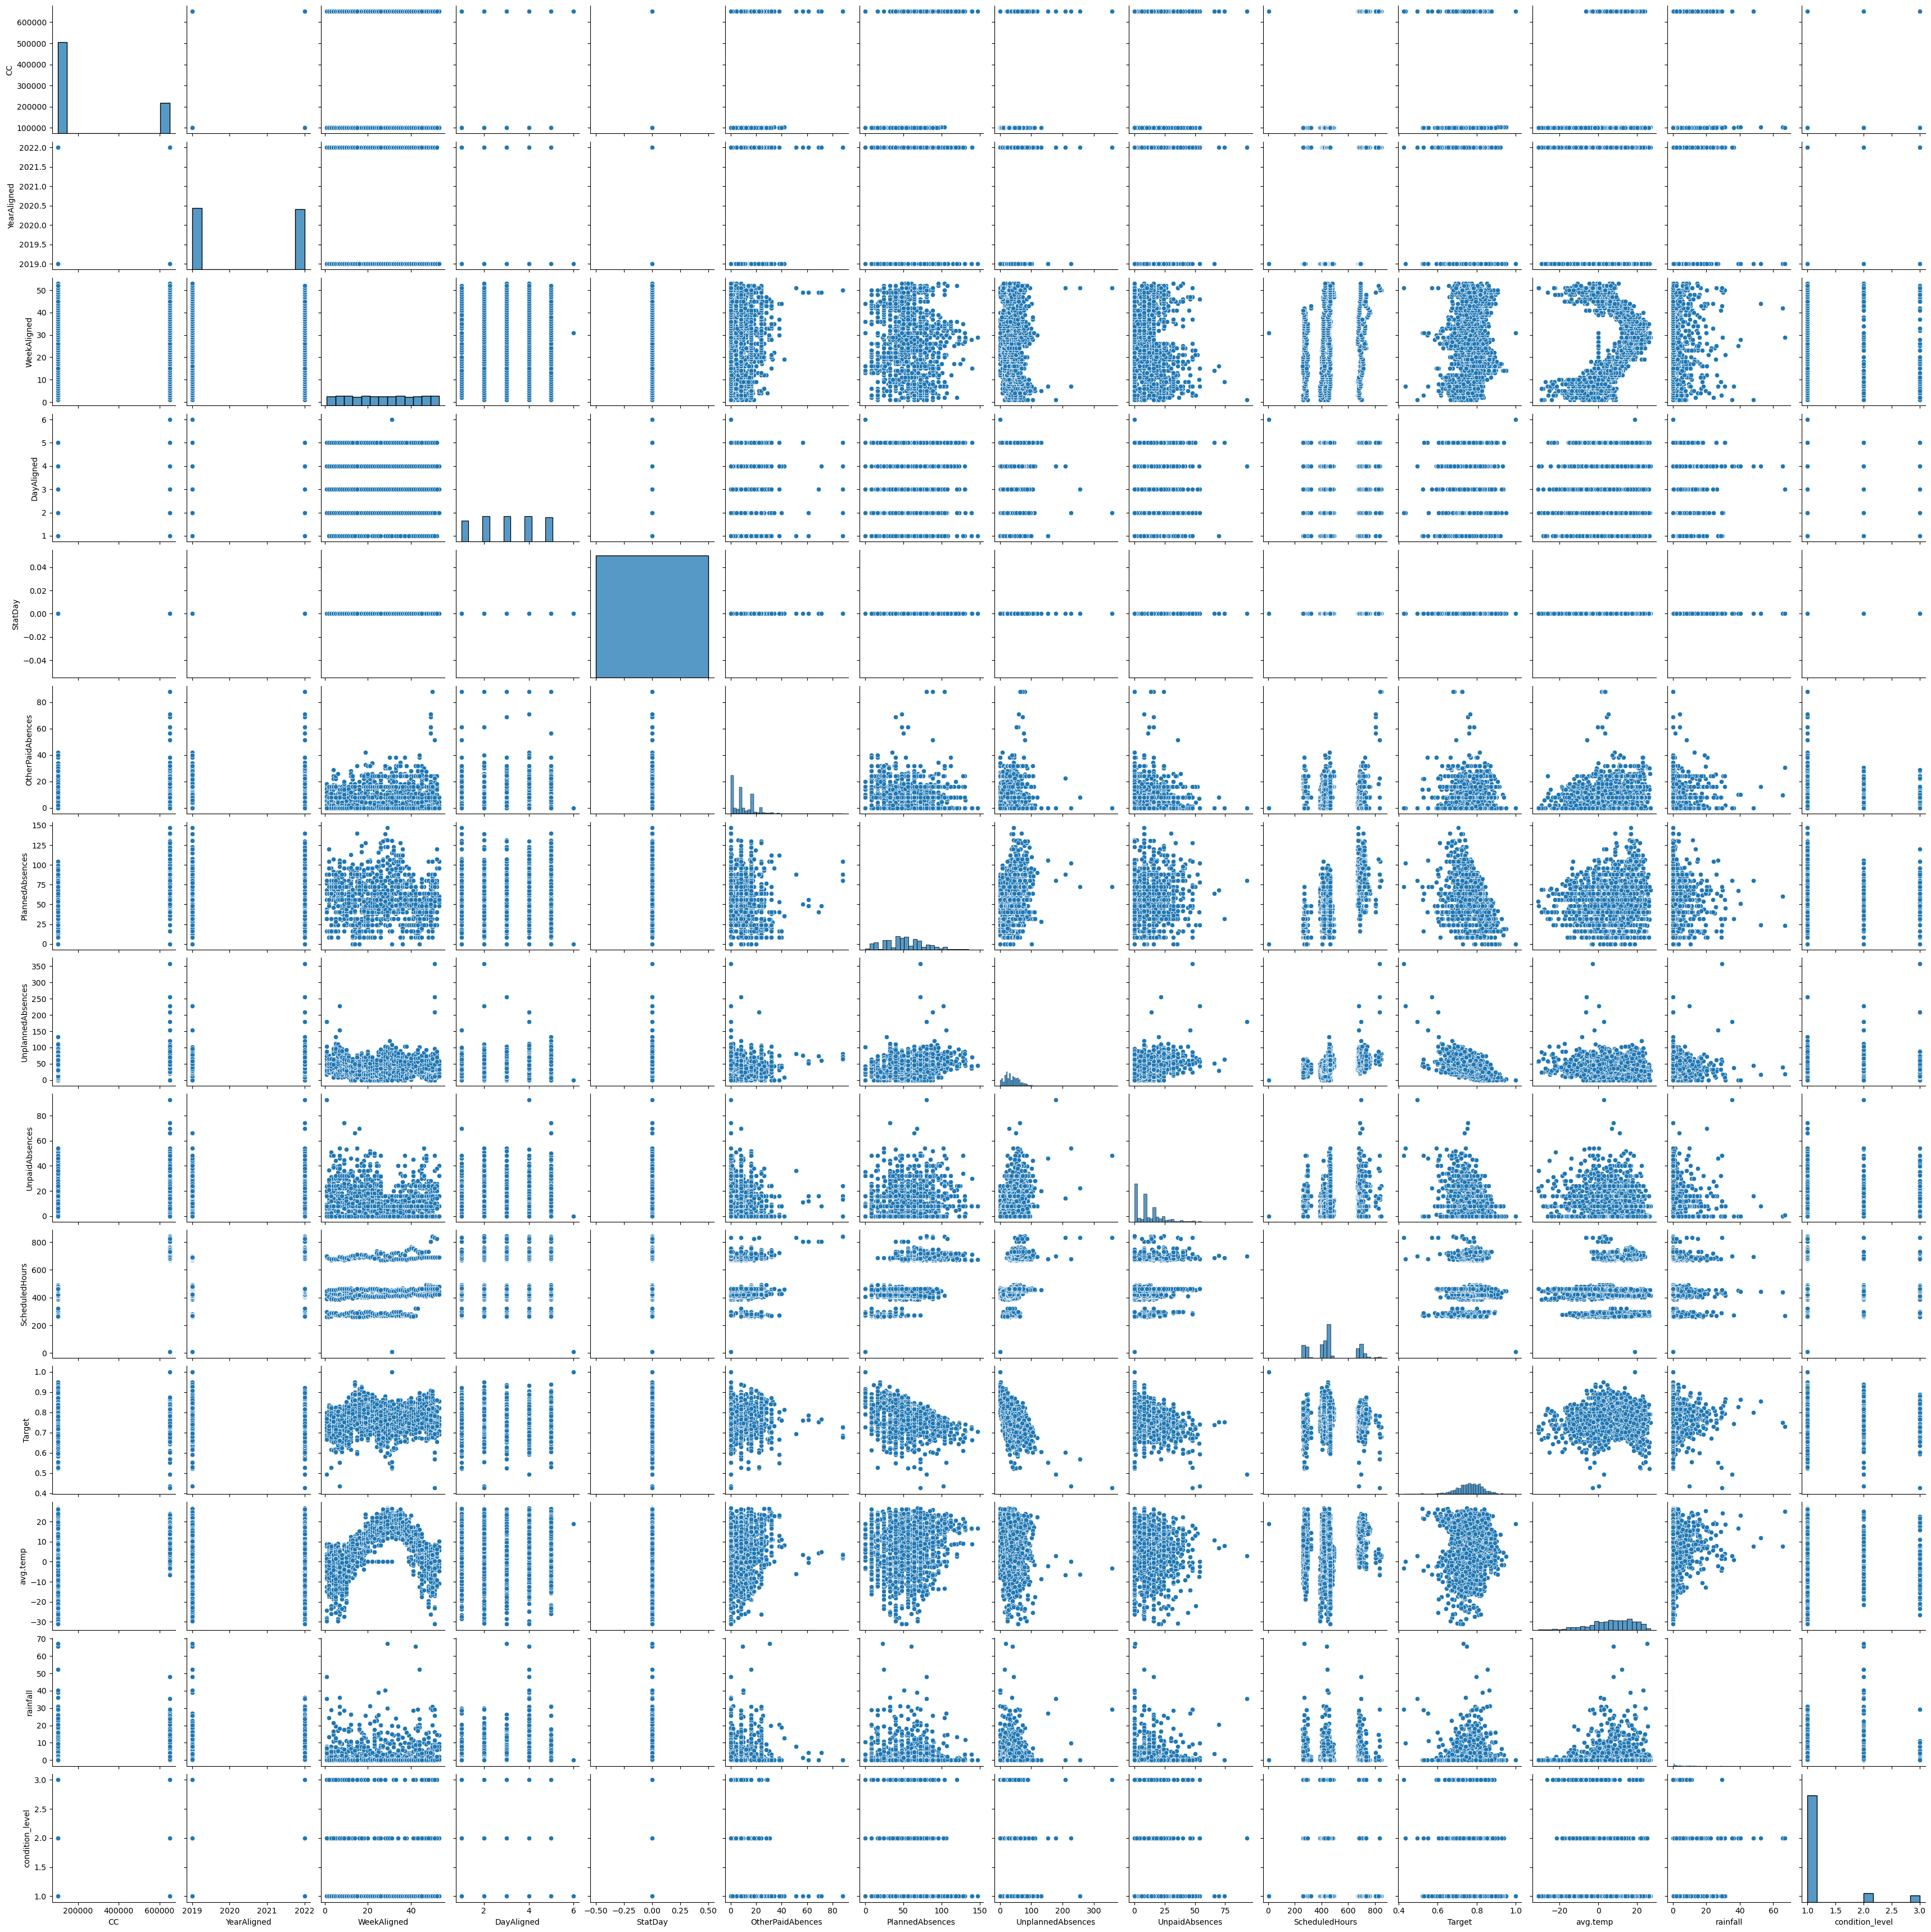

In [10]:
sns.pairplot(df)
plt.show()

### Heatmap of correlations

<AxesSubplot:>

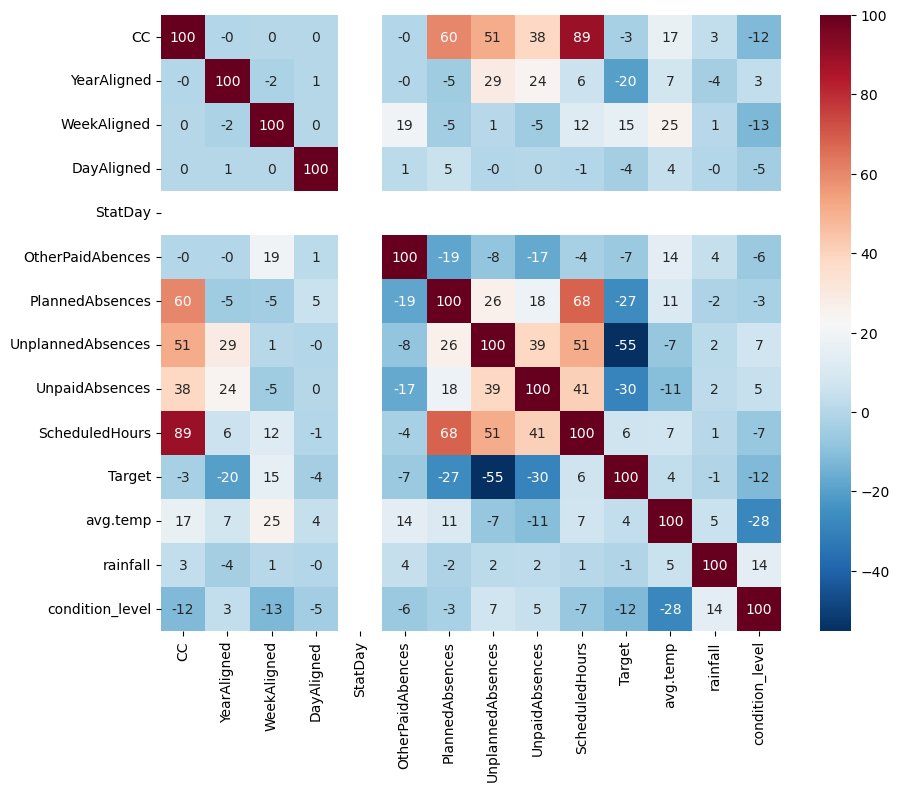

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr()*100,annot = True, cmap='RdBu_r', fmt='.0f') 

### Drop useless columns

In [12]:
df['Temp'] = df['avg.temp']
df['Rainfall'] = df['rainfall']
df['Condition Level'] = df['condition_level']
df['CC'] = df.CC.astype('category')
df['City'] = df['CC'].cat.codes

df = df.drop(["ATTDATE","WorkDay","StatDay","Prov","CITY","POSTAL_CODE","text",'avg.temp',
              "OtherPaidAbences","PlannedAbsences","UnplannedAbsences","UnpaidAbsences","ScheduledHours",
              "YearAligned","WeekAligned","DayAligned",'rainfall', 'condition_level', 'CC'
             ], axis=1)

## 4. Review dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Target           1991 non-null   float64
 1   Temp             1991 non-null   float64
 2   Rainfall         1991 non-null   float64
 3   Condition Level  1991 non-null   int64  
 4   City             1991 non-null   int8   
dtypes: float64(3), int64(1), int8(1)
memory usage: 64.3 KB


In [14]:
df.describe()

,Target,Temp,Rainfall,Condition Level,City
count,1991.000000,1991.00000,1991.000000,1991.00000,1991.000000
mean,0.765497,7.01007,1.914214,1.18232,1.500251
std,0.061413,11.07274,5.335055,0.51060,1.118989
min,0.425812,-31.10000,0.000000,1.00000,0.000000
25%,0.727528,0.00000,0.000000,1.00000,0.500000
50%,0.768199,8.10000,0.000000,1.00000,1.000000
75%,0.808736,15.80000,0.800000,1.00000,3.000000
max,1.000000,26.90000,67.000000,3.00000,3.000000


In [15]:
df.dtypes

Target             float64
Temp               float64
Rainfall           float64
Condition Level      int64
City                  int8
dtype: object

In [16]:
df

,Target,Temp,Rainfall,Condition Level,City
0,0.701611,-12.5,0.0,1,2
1,0.788406,-8.6,0.8,3,2
2,0.765188,-0.3,1.4,1,2
3,0.718853,-13.3,0.7,3,2
4,0.700714,-4.5,4.3,2,2
...,...,...,...,...,...
1986,0.600891,-6.5,0.0,3,3
1987,0.783478,0.4,11.4,2,3
1988,0.735634,5.8,0.3,1,3
1989,0.745947,4.4,2.2,1,3


## 5. Draw distribution plot

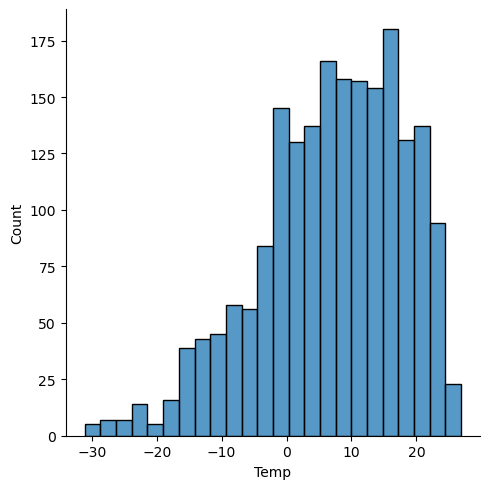

In [17]:
sns.displot(df, x='Temp')
plt.show()

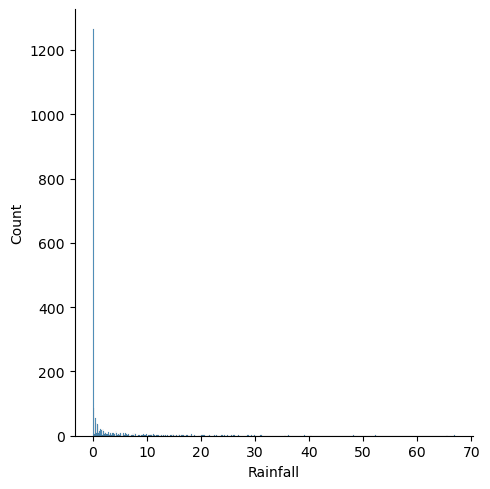

In [18]:
sns.displot(df, x='Rainfall')
plt.show()

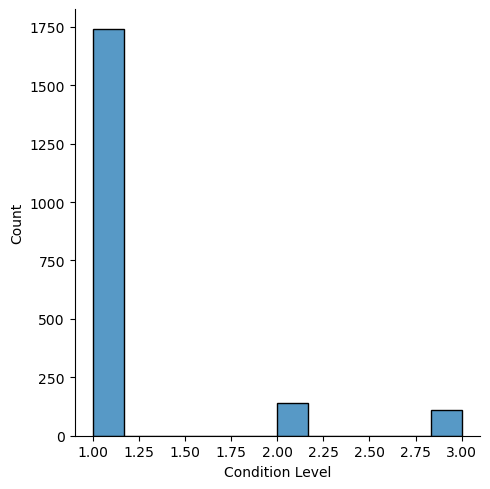

In [19]:
sns.displot(df, x='Condition Level')
plt.show()

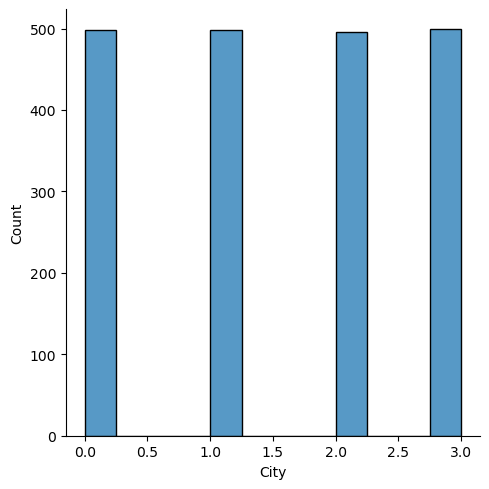

In [20]:
sns.displot(df, x='City')
plt.show()

## 6. Draw scatter plot

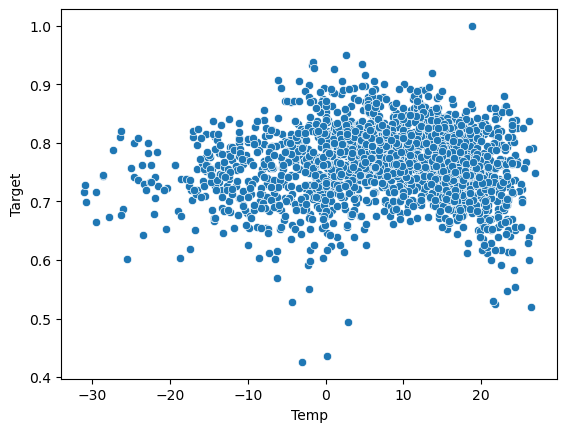

In [21]:
sns.scatterplot(data=df, x="Temp", y="Target")
plt.show()

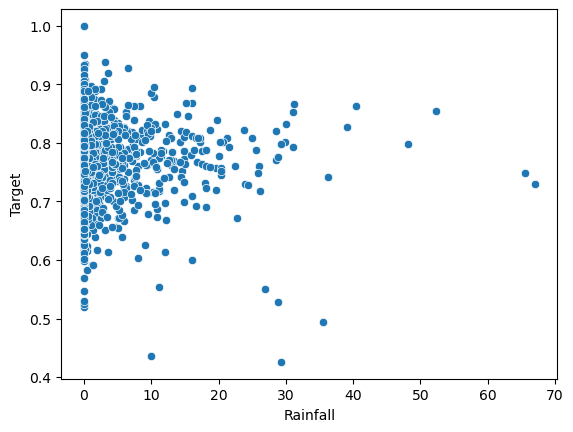

In [22]:
sns.scatterplot(data=df, x="Rainfall", y="Target")
plt.show()

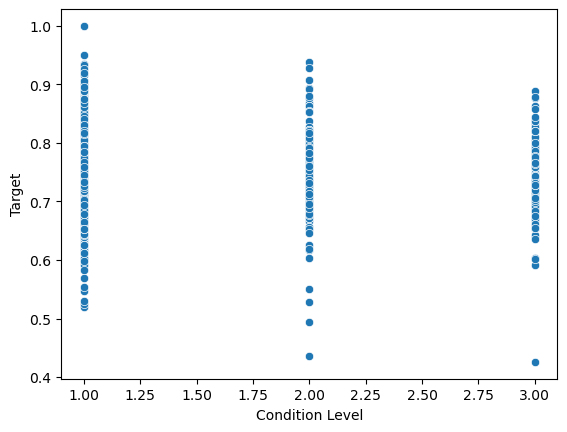

In [23]:
sns.scatterplot(data=df, x="Condition Level", y="Target")
plt.show()

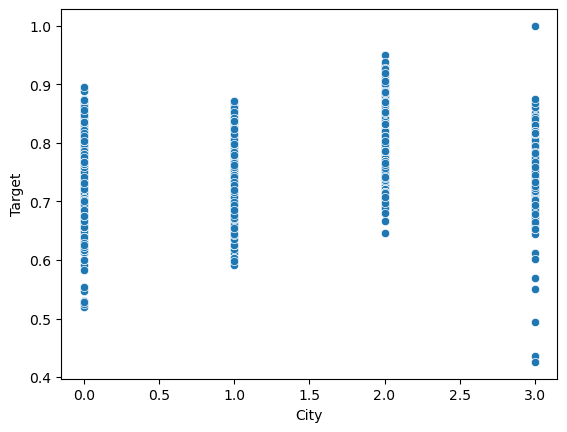

In [24]:
sns.scatterplot(data=df, x="City", y="Target")
plt.show()

## 7. XGBoost Regression Attempt

In [25]:
x = df.drop('Target',axis=1)
y = df['Target']

Now, we convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [26]:
# import XGBoost
!pip install xgboost
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [27]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((1393, 4), (598, 4))

In [28]:
# import XGBRegressor
from xgboost import XGBRegressor

# declare parameters
params = {
            'max_depth': 8,
            'eta': 0.3,
            'booster':'gbtree',
            'min_child_weight':1
        }
num_round = 50
            
# instantiate the regressor 
xgb_rgs = XGBRegressor(**params)

# fit the regressor to the training data
xgb_rgs.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [29]:
# Use the trained model to make predictions on the test data
y_test_pred = xgb_rgs.predict(X_test)
y_train_pred = xgb_rgs.predict(X_train)

# Evaluate the performance of the model using Mean Absolute Error
# Mean Absolute Error measures how close a regression line is to a set of data points
# mae. the lower the value the better and 0 means the model is perfect

mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error for Test dataset:', mae)
mae = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error for Trained dataset:', mae)

Mean Absolute Error for Test dataset: 0.046544888212178205
Mean Absolute Error for Trained dataset: 0.01445058630907391


## 8. Feature importance with XGBoost


XGBoost provides a way to examine the importance of each feature in the original dataset within the model. It involves counting the number of times each feature is split on across all boosting trees in the model. Then we visualize the result as a bar graph, with the features ordered according to how many times they appear. 

XGBoost has a **plot_importance()** function that helps us to achieve this task. Then we can visualize the features that has been given the highest important score among all the features. Thus XGBoost provides us a way to do feature selection.

I will proceed as follows:-


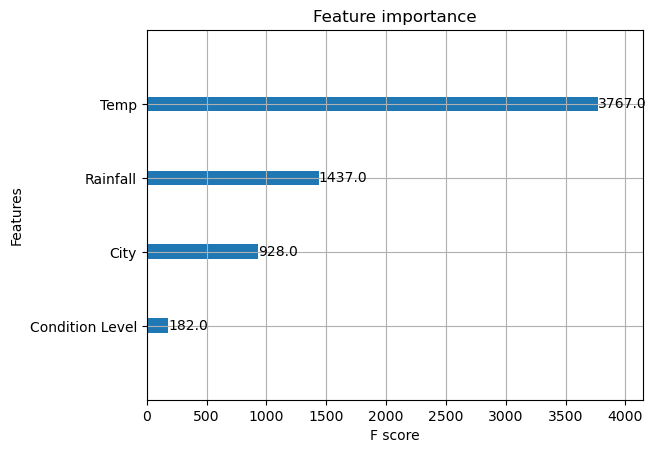

In [30]:
xgb.plot_importance(xgb_rgs)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

We can see that the feature `avg.temp`  has been given the highest importance score among all the features. Thus XGBoost also gives us a way to do Feature Selection.

In [31]:
y_pred = xgb_rgs.predict(x)

expected = y
predicted = y_pred
df_m=pd.DataFrame()
df_m['Expected'] = pd.Series(y)
df_m['Predicted'] = pd.Series(y_pred)

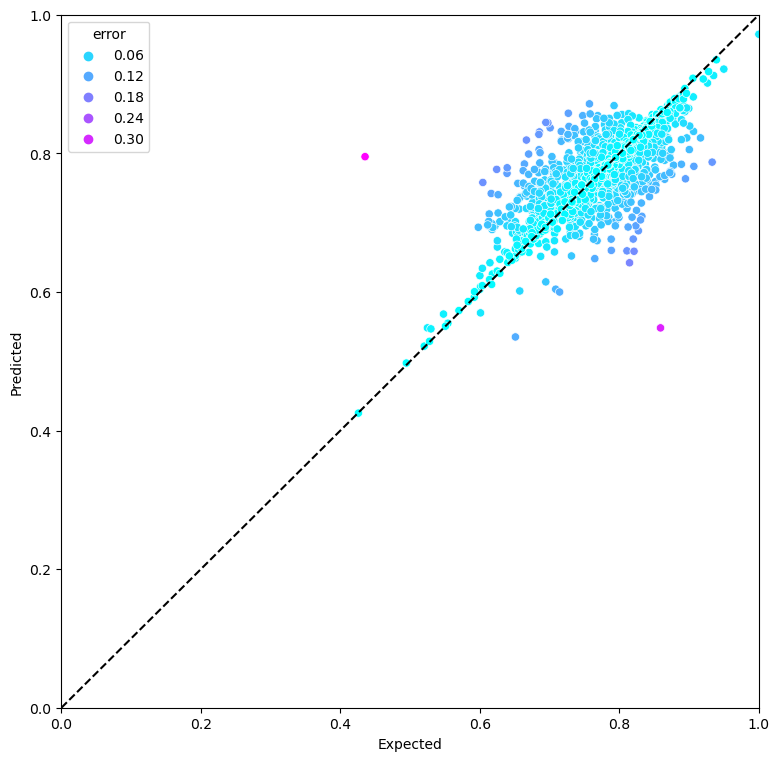

In [32]:
figure = plt.figure(figsize=(9, 9))
df_m['error'] = abs(df_m['Expected'] - df_m['Predicted'])

axes = sns.scatterplot(data=df_m, x='Expected', y='Predicted', 
    hue='error', palette='cool', legend=True)

start = 0
end = 1
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

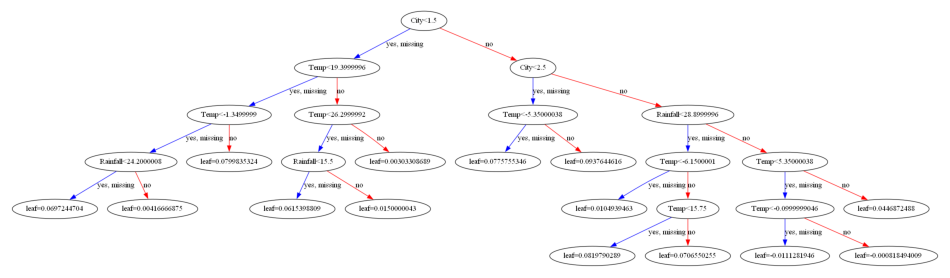

In [33]:
# plot decision tree
!pip install graphviz
import graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt

# plot single tree
plt.rcParams["figure.figsize"] = (12, 9)
plot_tree(xgb_rgs)
plt.show()

## 9. Validate model with test dataset from Jan - Mar 2023

In [34]:
# Import dataset
df=pd.read_excel('Attend_Holiday_Weather_Merge230402_test_dataset.xlsx')

In [35]:
df.shape

(236, 18)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ATTDATE              236 non-null    datetime64[ns]
 1   CC                   236 non-null    int64         
 2   YearAligned          236 non-null    int64         
 3   WeekAligned          236 non-null    int64         
 4   DayAligned           236 non-null    object        
 5   WorkDay              236 non-null    object        
 6   StatDay              0 non-null      float64       
 7   OtherPaidAttendance  236 non-null    float64       
 8   PlannedAbsences      236 non-null    float64       
 9   UnplannedAbsences    236 non-null    float64       
 10  UnpaidAbsences       236 non-null    float64       
 11  ScheduledHours       236 non-null    float64       
 12  CITY                 236 non-null    object        
 13  POSTAL_CODE          236 non-null  

In [37]:
df.describe()

,CC,YearAligned,WeekAligned,StatDay,OtherPaidAttendance,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours,rainfall,avg.temp,condition_level,Target
count,236.00000,236.0,236.00000,0.0,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,238799.50000,2023.0,6.59322,NaN,11.450678,75.602119,31.087754,11.425085,541.152331,2.071186,-1.955508,1.330508,0.753090
std,238619.66597,0.0,3.41271,NaN,9.025226,30.512570,16.037913,10.171246,155.346106,4.519972,6.662209,0.605719,0.054645
min,100636.00000,2023.0,1.00000,NaN,0.000000,16.000000,0.000000,0.000000,408.000000,0.000000,-25.400000,1.000000,0.574561
25%,100693.00000,2023.0,4.00000,NaN,4.000000,56.000000,22.000000,3.500000,440.000000,0.000000,-6.000000,1.000000,0.717121
50%,101670.00000,2023.0,7.00000,NaN,10.000000,72.000000,32.000000,8.000000,464.000000,0.000000,-0.950000,1.000000,0.754673
75%,239776.50000,2023.0,10.00000,NaN,17.962500,88.000000,40.000000,16.000000,565.360000,1.650000,3.225000,2.000000,0.794992
max,651222.00000,2023.0,12.00000,NaN,48.000000,180.450000,70.000000,54.000000,831.920000,30.600000,9.700000,3.000000,0.882642


In [38]:
df.dtypes

ATTDATE                datetime64[ns]
CC                              int64
YearAligned                     int64
WeekAligned                     int64
DayAligned                     object
WorkDay                        object
StatDay                       float64
OtherPaidAttendance           float64
PlannedAbsences               float64
UnplannedAbsences             float64
UnpaidAbsences                float64
ScheduledHours                float64
CITY                           object
POSTAL_CODE                    object
rainfall                      float64
avg.temp                      float64
condition_level                 int64
Target                        float64
dtype: object

In [39]:
df['Temp'] = df['avg.temp']
df['Rainfall'] = df['rainfall']
df['Condition Level'] = df['condition_level']
df['CC'] = df.CC.astype('category')
df['City'] = df['CC'].cat.codes

df = df.drop(["ATTDATE","WorkDay","StatDay","CITY","POSTAL_CODE",'avg.temp',
              "OtherPaidAttendance","PlannedAbsences","UnplannedAbsences","UnpaidAbsences","ScheduledHours",
              "YearAligned","WeekAligned","DayAligned",'rainfall', 'condition_level', 'CC'
             ], axis=1)

In [40]:
df

,Target,Temp,Rainfall,Condition Level,City
0,0.783954,2.1,0.0,2,2
1,0.746549,1.9,4.4,1,2
2,0.734108,-3.0,3.6,2,2
3,0.711601,-2.2,0.6,1,2
4,0.720804,-4.3,0.4,1,2
...,...,...,...,...,...
231,0.771989,7.6,2.4,1,3
232,0.777756,6.3,0.6,1,3
233,0.794978,6.9,0.0,2,3
234,0.809092,5.3,1.5,1,3


In [41]:
x = df.drop('Target',axis=1)
y = df['Target']

In [42]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((165, 4), (71, 4))

In [43]:
# Use the trained model to make predictions on the test data
y_test_pred = xgb_rgs.predict(X_test)
y_train_pred = xgb_rgs.predict(X_train)

# Evaluate the performance of the model using Mean Absolute Error
# Mean Absolute Error measures how close a regression line is to a set of data points
# mae. the lower the value the better and 0 means the model is perfect

mae = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error for Test dataset:', mae)
mae = mean_absolute_error(y_train, y_train_pred)
print('Mean Absolute Error for Trained dataset:', mae)

Mean Absolute Error for Test dataset: 0.05647957035673954
Mean Absolute Error for Trained dataset: 0.054966023408474805


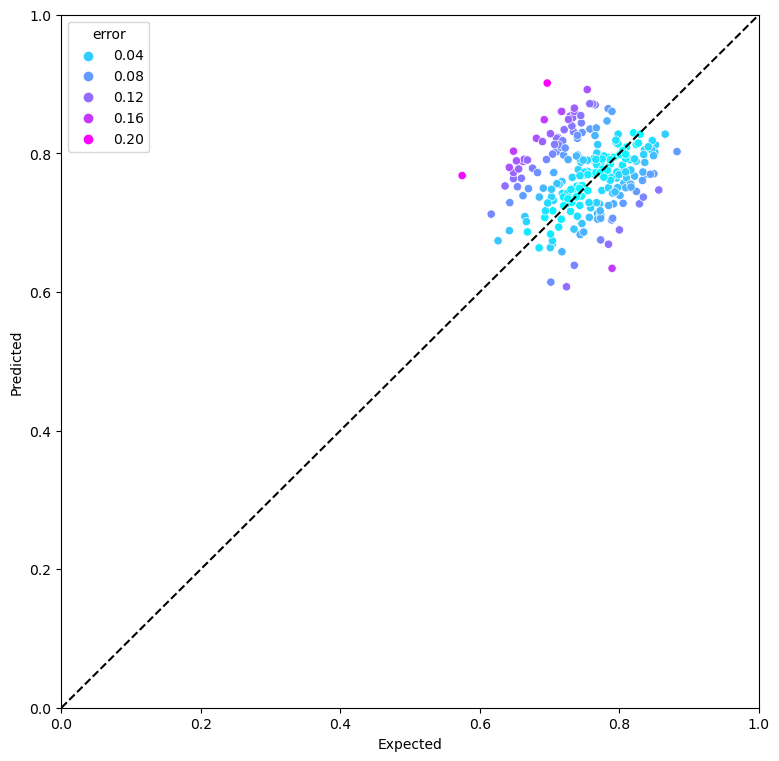

In [44]:
y_pred = xgb_rgs.predict(x)

expected = y
predicted = y_pred
df_m=pd.DataFrame()
df_m['Expected'] = pd.Series(y)
df_m['Predicted'] = pd.Series(y_pred)
df_m['error'] = abs(df_m['Predicted'] - df_m['Expected'])
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df_m, x='Expected', y='Predicted', 
    hue='error', palette='cool', legend=True)

start = 0
end = 1
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

![Prediction_with_Expectation_Jan_to_March_2023](Jan_March_2023.png)

### Pseudo website

[Canada Post Attendance Predict System](https://bicapstone.leon-web-dev.com/)